In [20]:
import pandas as pd
import numpy as np

import statsmodels.api as sm 
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg

import matplotlib.pyplot as plt
%matplotlib inline

import patsy
import seaborn as sns

from sklearn import datasets
from sklearn import model_selection 
from sklearn import linear_model

import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

The scikit-learn version is 1.5.1.


In [22]:
df = pd.read_csv("house.csv")
df.head()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,26.184098,1286.68,204.003817,22,67,96004.804557
1,1,34.866901,1855.25,186.980360,8,30,92473.722568
2,1,36.980709,692.09,111.224999,24,24,98112.519942
3,1,17.445723,1399.49,237.998760,1,66,92118.326874
4,1,52.587646,84.65,100.996400,20,3,98976.653176


In [24]:
#df.info()
df.head()
#df.tail()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,26.184098,1286.68,204.003817,22,67,96004.804557
1,1,34.866901,1855.25,186.980360,8,30,92473.722568
2,1,36.980709,692.09,111.224999,24,24,98112.519942
3,1,17.445723,1399.49,237.998760,1,66,92118.326874
4,1,52.587646,84.65,100.996400,20,3,98976.653176


In [26]:
df.describe()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
count,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000
mean,3.732823,118.941327,1090.544301,105.665358,9.397168,48.576834,95701.196185
std,2.476989,95.469802,555.325830,60.750825,7.517018,27.621465,3919.823988
min,1.000000,10.244518,11.800000,1.245338,1.000000,0.000000,86113.592974
25%,2.000000,52.240659,635.897500,56.156897,2.000000,25.000000,92934.251436
50%,3.000000,91.828201,1143.135000,101.388012,8.000000,48.000000,95337.792918
75%,5.000000,150.987591,1554.280000,148.481068,16.000000,72.000000,97980.675094
max,17.000000,750.971604,1999.840000,330.275317,24.000000,97.000000,118134.771190


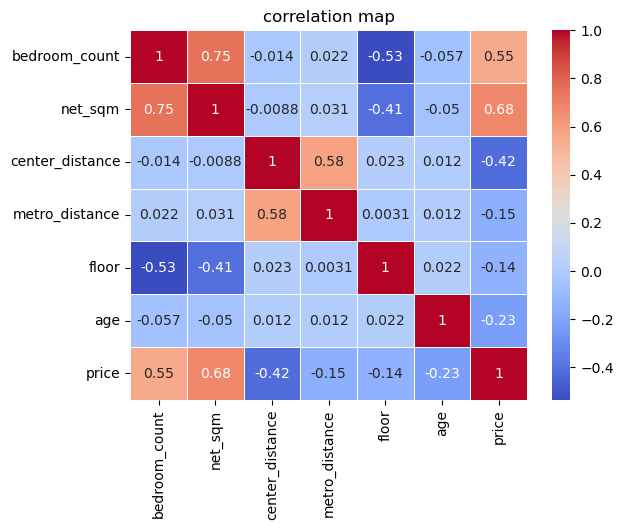

<Figure size 1000x1000 with 0 Axes>

In [28]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("correlation map")
plt.figure(figsize=(10, 10))
#plt.savefig("Correlation_map")
plt.show() 

In [30]:
df["bedroom_count*net_sqm"] =df["net_sqm"] * df["bedroom_count"]
df["center_distance*metro_distance"] = df["center_distance"] * df["metro_distance"]  

In [32]:
df.head()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price,bedroom_count*net_sqm,center_distance*metro_distance
0,1,26.184098,1286.68,204.003817,22,67,96004.804557,26.184098,262487.631641
1,1,34.866901,1855.25,186.980360,8,30,92473.722568,34.866901,346895.313666
2,1,36.980709,692.09,111.224999,24,24,98112.519942,36.980709,76977.709700
3,1,17.445723,1399.49,237.998760,1,66,92118.326874,17.445723,333076.884577
4,1,52.587646,84.65,100.996400,20,3,98976.653176,52.587646,8549.345218


In [34]:
y = df["price"]
X = df[["bedroom_count","net_sqm", "center_distance","metro_distance", "floor", "age", "bedroom_count*net_sqm", "center_distance*metro_distance"]]
X = sm.add_constant(X)
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     1385.
Date:                Fri, 20 Dec 2024   Prob (F-statistic):               0.00
Time:                        17:55:36   Log-Likelihood:                -39010.
No. Observations:                4308   AIC:                         7.804e+04
Df Residuals:                    4299   BIC:                         7.810e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [36]:
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(X, y, train_size=0.8, random_state=42)
X_train.shape, y_train.shape
X_test.shape, y_test.shape
model = linear_model.LinearRegression() 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [38]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7173812338524806
0.7322802562748558


In [40]:
def sse(resid):
    return np.sum(resid**2)  
resid_train = y_train - model.predict(X_train)
resid_test = y_test - model.predict(X_test)
sse_train = sse(resid_train)
sse_test = sse(resid_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Sum of squared error:", sse_train, sse_test)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Sum of squared error: 15069962096.856203 3434375258.515253
Mean Squared Error: 3984194.0354005257
Mean Absolute Error: 1475.1777329618228


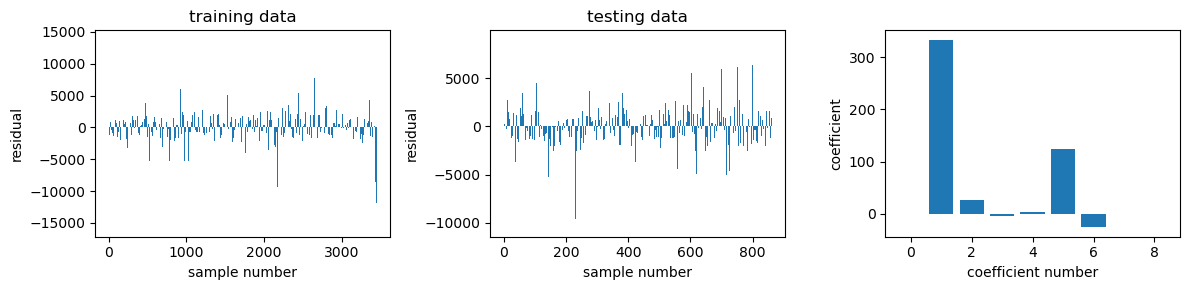

In [42]:
def plot_residuals_and_coeff(resid_train, resid_test, coeff):
    fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    axes[0].bar(np.arange(len(resid_train)), resid_train)
    axes[0].set_xlabel("sample number")
    axes[0].set_ylabel("residual")
    axes[0].set_title("training data")
    axes[1].bar(np.arange(len(resid_test)), resid_test)
    axes[1].set_xlabel("sample number")
    axes[1].set_ylabel("residual")
    axes[1].set_title("testing data")
    axes[2].bar(np.arange(len(coeff)), coeff)
    axes[2].set_xlabel("coefficient number")
    axes[2].set_ylabel("coefficient")
    fig.tight_layout()
    #plt.savefig("residualandcoefficient")
    return fig, axes
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)
plt.show() 

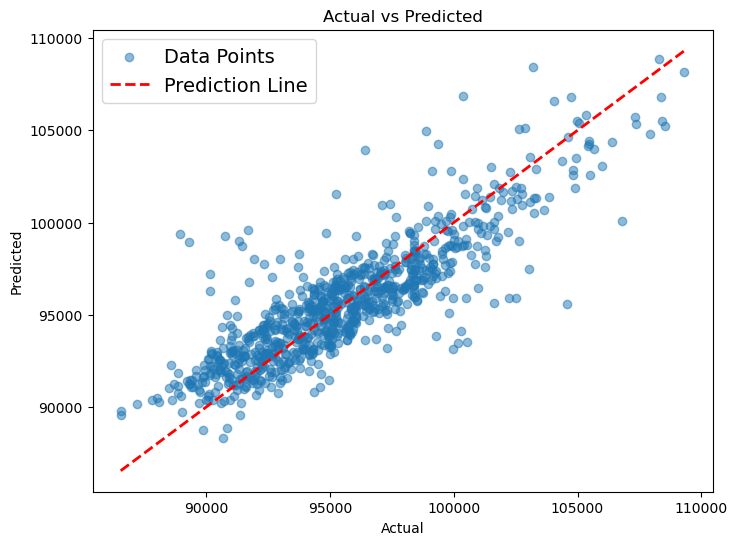

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend(['Data Points', 'Prediction Line'], loc='upper left', fontsize=14)
plt.title('Actual vs Predicted')
#plt.savefig("actualvpredictedval")
plt.show() 

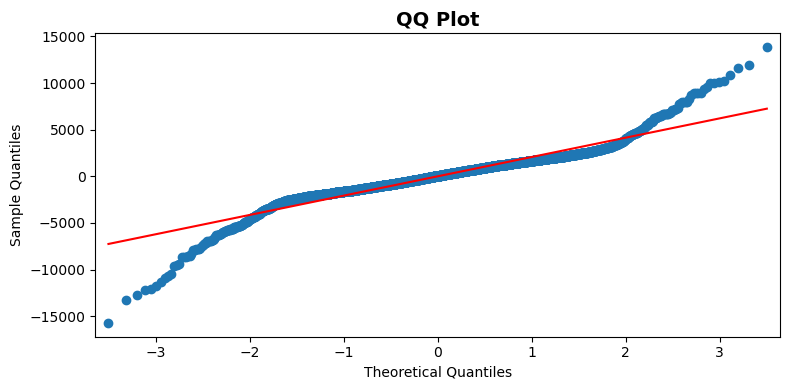

In [44]:
fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result.resid, line="s", ax=ax)
ax.set_title("QQ Plot", fontsize=14, fontweight="bold")
fig.tight_layout()
#plt.savefig("qqplot")
plt.show() 

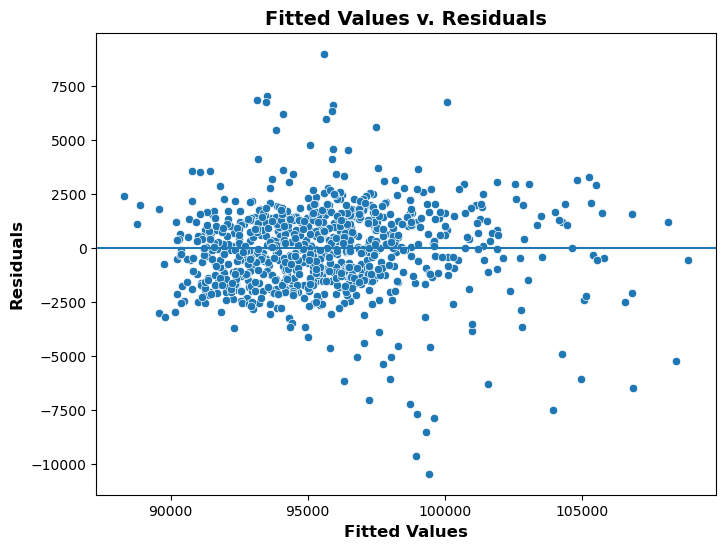

In [45]:
residuals = y_test - y_pred
plt.subplots(figsize=(8, 6))
fig = sns.scatterplot(x=y_pred, y=residuals)
fig.set_xlabel("Fitted Values", fontsize=12, fontweight="bold")
fig.set_ylabel("Residuals", fontsize=12, fontweight="bold")
fig.set_title("Fitted Values v. Residuals", fontsize=14, fontweight="bold")
fig.axhline(0)
#plt.savefig("fitvresiduals")
plt.show() 

In [46]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=150.0)
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)  

(0.7173725894144304, 0.7323883146905875)

In [47]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=100.0)
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.7168987090212271, 0.7327463160388077)

In [48]:
from sklearn.linear_model import ElasticNetCV
model = ElasticNetCV(cv=2)
model.fit(X_train,y_train)
model.alpha_
model.l1_ratio_
model.score(X_train, y_train), model.score(X_test, y_test)  

(0.5290513917855861, 0.541258795080654)